## Used Car Price Prediction

In [1]:
# importing libraries
import numpy as np
import pandas as pd

In [2]:
# importing the dataset
data = pd.read_csv(r"D:\IITR\ML Project\Oasis Infobyte\Car Price Prediction\car data.csv")

In [3]:
# having a breif overview of the data
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.shape

(301, 9)

In [5]:
# datatypes of different columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [7]:
# data statistics
data.describe(exclude = 'object')

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [9]:
# Checking for duplicate data
print(data.duplicated().sum())

2


In [10]:
# removing any duplicate rows
data.drop_duplicates(keep='last', inplace=True)

In [11]:
data.shape

(299, 9)

In [12]:
# Checking for Missing Values
print('Missing Values:')
data.isnull().sum()

Missing Values:


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [13]:
# Looking for value counts of various categorical columns

In [14]:
data['Year'].value_counts()

Year
2015    60
2016    49
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: count, dtype: int64

In [15]:
data['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64

In [16]:
data['Selling_type'].value_counts()

Selling_type
Dealer        193
Individual    106
Name: count, dtype: int64

In [17]:
data['Transmission'].value_counts()

Transmission
Manual       260
Automatic     39
Name: count, dtype: int64

In [18]:
data['Owner'].value_counts()

Owner
0    288
1     10
3      1
Name: count, dtype: int64

## Data Visualization

In [19]:
# importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1000x600 with 0 Axes>

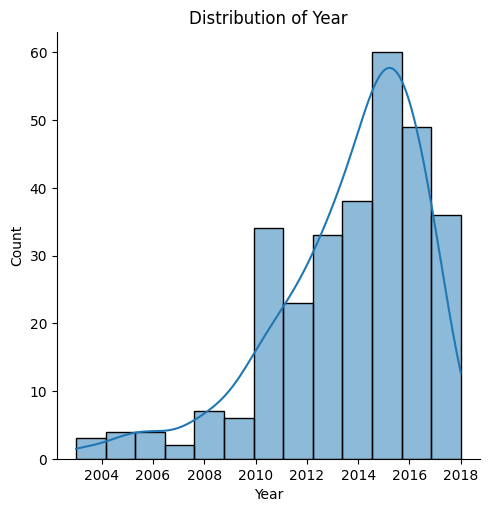

<Figure size 1000x600 with 0 Axes>

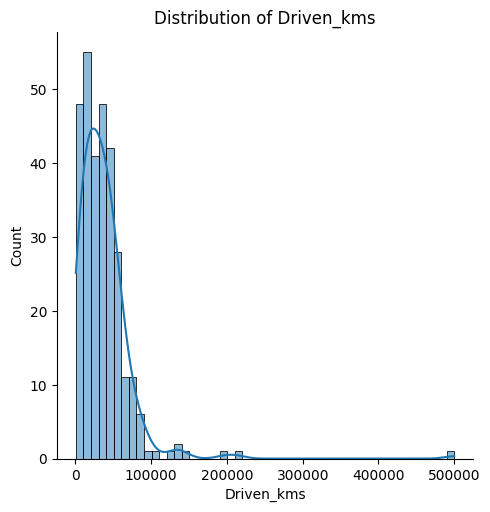

<Figure size 1000x600 with 0 Axes>

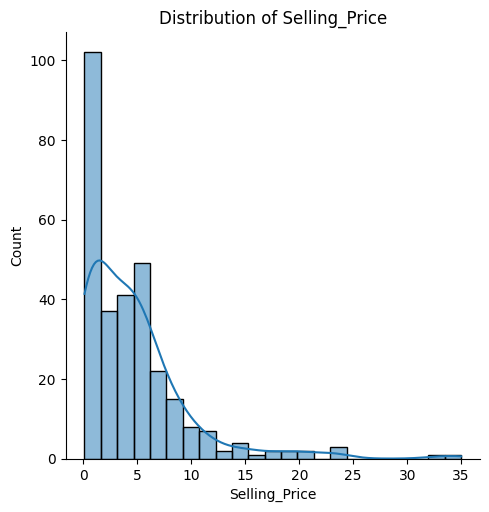

<Figure size 1000x600 with 0 Axes>

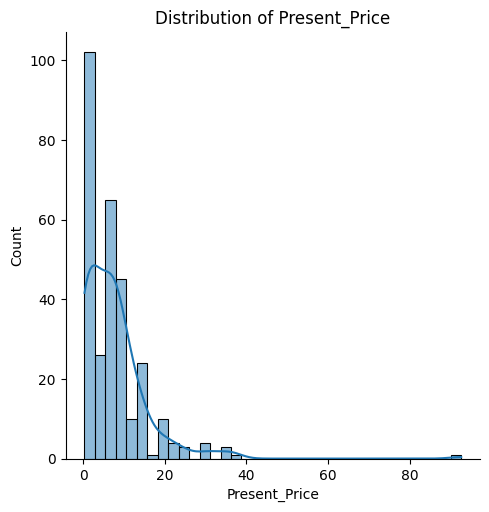

In [20]:
# Distribution of values of columns having numerical data
numerical_features = ['Year', 'Driven_kms', 'Selling_Price', 'Present_Price']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.displot(data= data, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_16992\3272579703.py:13: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.countplot(x=feature, data=data, hue=feature, legend=False, palette=shortened_palette)


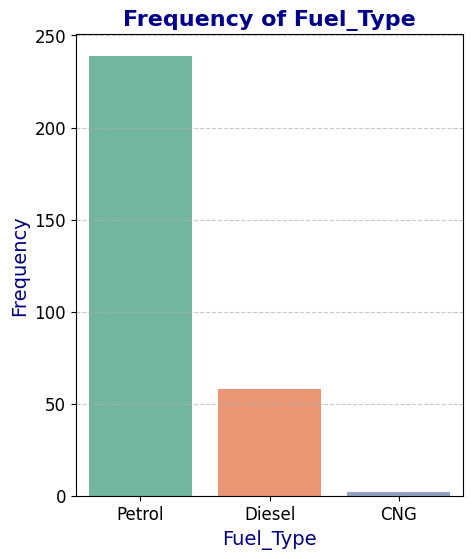

C:\Users\HP\AppData\Local\Temp\ipykernel_16992\3272579703.py:13: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data, hue=feature, legend=False, palette=shortened_palette)


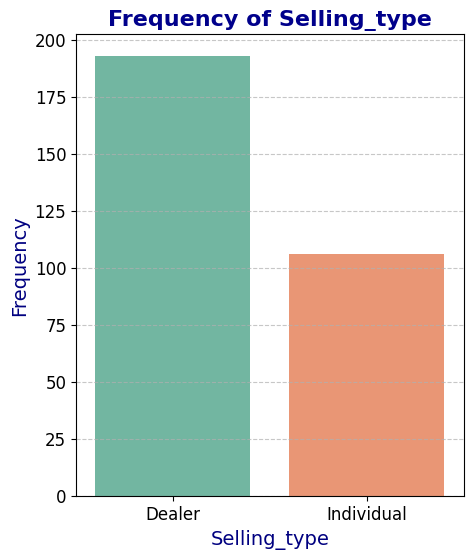

C:\Users\HP\AppData\Local\Temp\ipykernel_16992\3272579703.py:13: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data, hue=feature, legend=False, palette=shortened_palette)


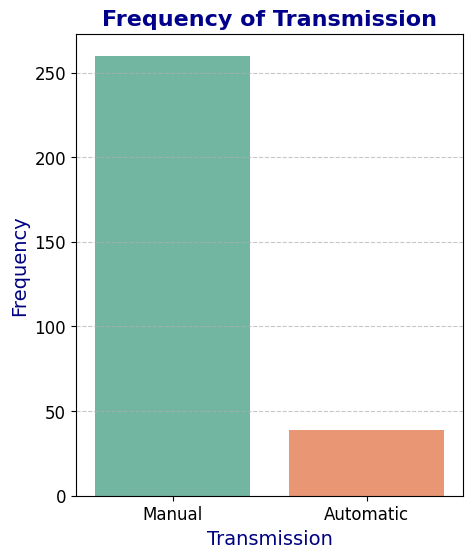

C:\Users\HP\AppData\Local\Temp\ipykernel_16992\3272579703.py:13: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.countplot(x=feature, data=data, hue=feature, legend=False, palette=shortened_palette)


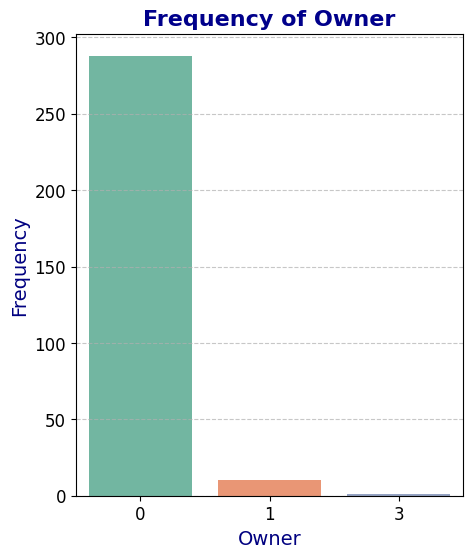

In [21]:
# Distribution of values of columns having categorical data

# Defining a color palette for the plots
num_categories = len(data[feature].unique())
colors = sns.color_palette("Set2")
shortened_palette = colors[:num_categories]


categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission', 'Owner']

for feature in categorical_features:
    plt.figure(figsize=(5, 6))
    sns.countplot(x=feature, data=data, hue=feature, legend=False, palette=shortened_palette)
    plt.title(f'Frequency of {feature}', fontsize=16, color='darkblue', fontweight='bold')
    plt.xlabel(f'{feature}', fontsize=14, color='navy')
    plt.ylabel('Frequency', fontsize=14, color='navy')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

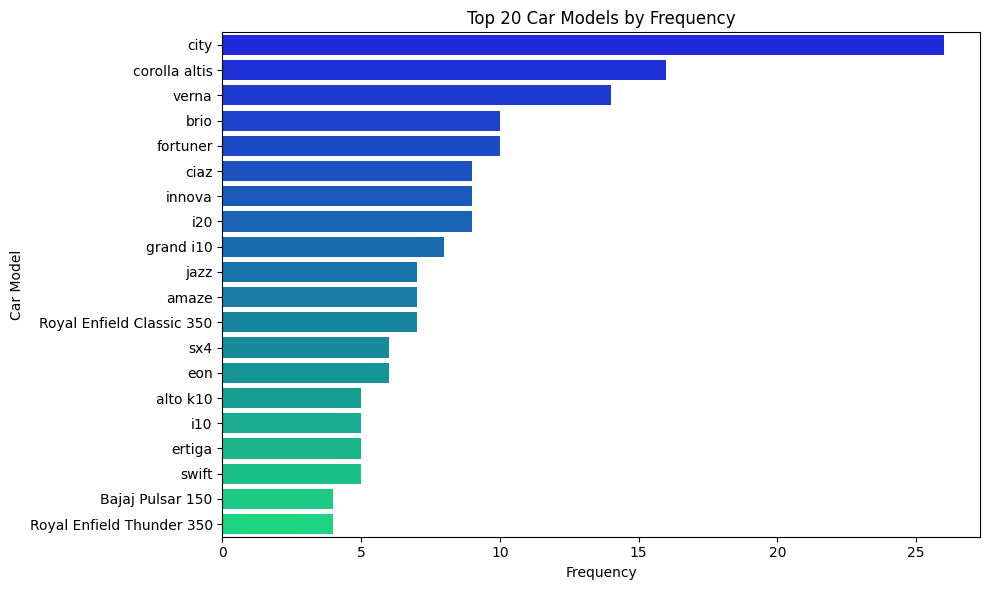

In [22]:
# Top Car Models by Frequency

n = 20  # Number of top car models to plot
top_car_models = data['Car_Name'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index, hue=top_car_models.index, palette='winter')
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

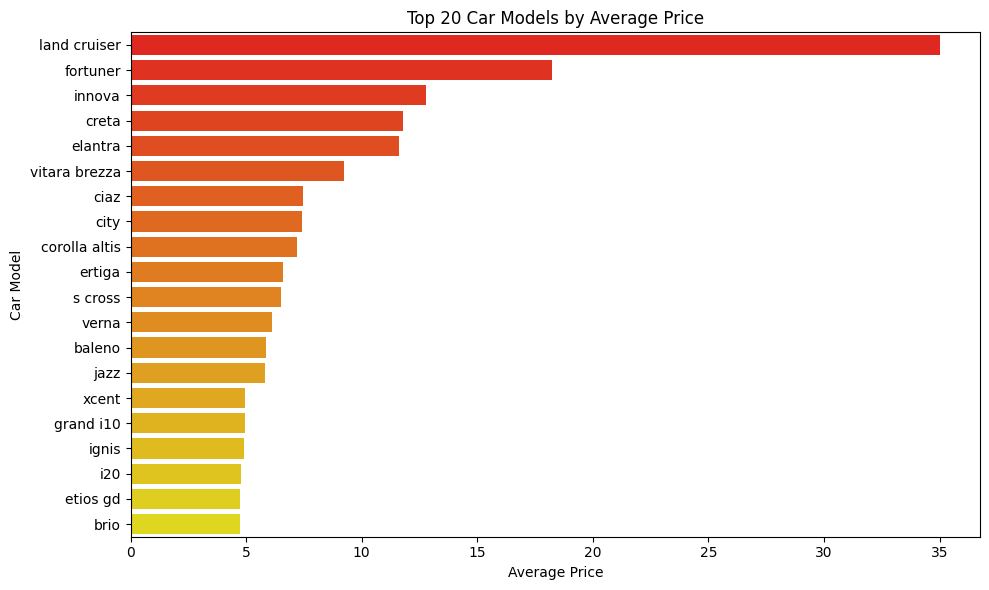

In [23]:
# Plot top car models by average price

# Calculating average price for each car model
avg_prices_by_car = data.groupby('Car_Name')['Selling_Price'].mean().sort_values(ascending=False)

n = 20  # Number of top car models to plot
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index, hue=top_car_models.index, palette='autumn')
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

## Handling Outliers

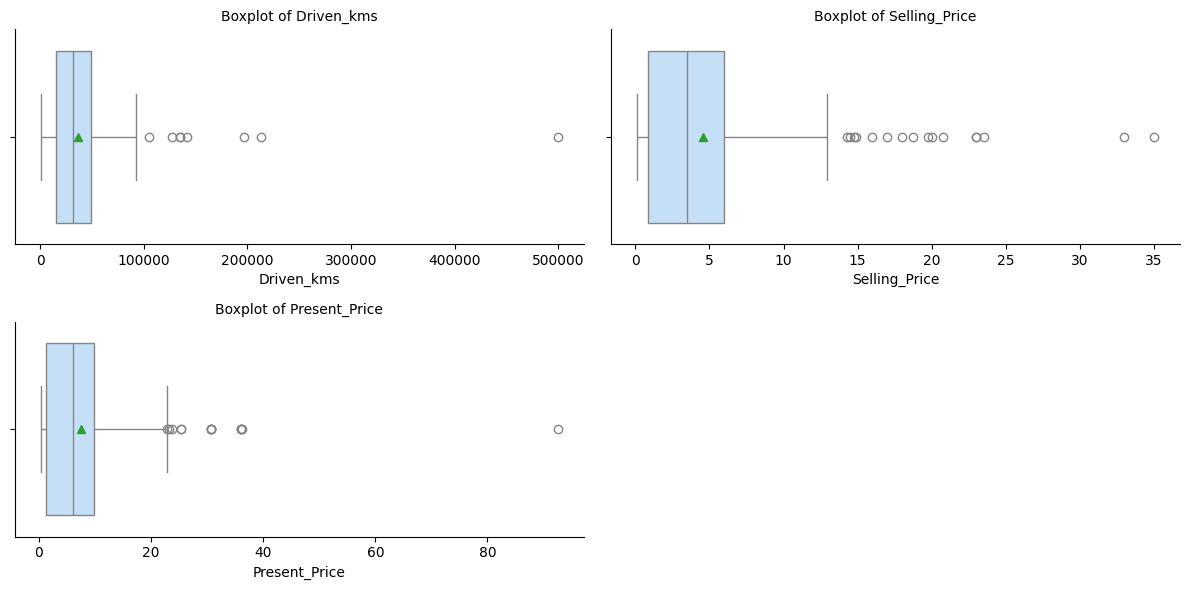

In [24]:
numerical_features = ['Driven_kms', 'Selling_Price', 'Present_Price']

plt.figure(figsize=(12, 6))

for i, feature in enumerate(numerical_features, start=1):
    
    ax = plt.subplot(2, 2, i) 

    sns.boxplot(
        data=data,
        x=feature,  
        showmeans=True,  # for displaying mean as a marker within the box
        ax=ax,
        color='#BDE0FE'
    )

    plt.title(f'Boxplot of {feature}', fontsize=10)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Tight layout to prevent overlapping elements
plt.tight_layout()

plt.show()

In [25]:
# looking for those attributes (columns) only that has more than 3% outliers

def calculate_iqr_outliers(data, numerical_columns, threshold=3):

  numerical_columns = ['Selling_Price', 'Present_Price', 'Driven_kms']

  for col in numerical_columns:
      
    # Calculating InterQuantile Range
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1

    # Calculating lower and upper bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Counting outliers
    outliers = len(data[(data[col] < lower_bound) | (data[col] > upper_bound)])

    # Calculating and printing percentage (if above threshold)
    outlier_percentage = (outliers / len(data)) * 100
    if outlier_percentage > threshold:
      print(f"Column: {col} - Outlier Percentage: {outlier_percentage:.2f}%")

numerical_columns = data.select_dtypes(include=np.number).columns.tolist()

# Calculating and printing IQR outliers with threshold of 3%
calculate_iqr_outliers(data.copy(), numerical_columns.copy(), threshold=3)  # Avoid modifying original data

Column: Selling_Price - Outlier Percentage: 5.35%
Column: Present_Price - Outlier Percentage: 4.68%


## Data Transformation

In [26]:
# Mapping Categorical columns with integral values
data.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)
data.replace({'Selling_type': {'Dealer': 0, 'Individual': 1}}, inplace=True)
data.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)

df = data.copy()
df.drop('Car_Name', axis=1, inplace=True)  # Dropping Car_Name column 

C:\Users\HP\AppData\Local\Temp\ipykernel_16992\2948870594.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_16992\2948870594.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Selling_type': {'Dealer': 0, 'Individual': 1}}, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_16992\2948870594.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future 

In [27]:
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0
4,2014,4.60,6.87,42450,1,0,0,0


In [28]:
# to check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           299 non-null    int64  
 1   Selling_Price  299 non-null    float64
 2   Present_Price  299 non-null    float64
 3   Driven_kms     299 non-null    int64  
 4   Fuel_Type      299 non-null    int64  
 5   Selling_type   299 non-null    int64  
 6   Transmission   299 non-null    int64  
 7   Owner          299 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 21.0 KB


## Train Test Splitting

In [29]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 239
Rows in test set: 60



In [30]:
train_set.shape

(239, 8)

In [31]:
test_set.shape

(60, 8)

## Looking for Correlations

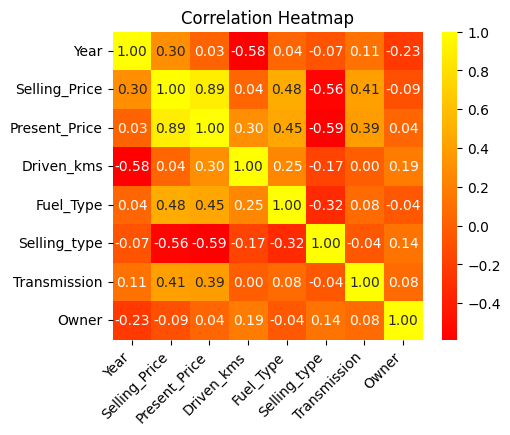

In [32]:
corr_matrix = train_set.corr()

# Creating a heatmap to visualize correlation
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='autumn', fmt=".2f")
plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha="right")
plt.show()

In [33]:
# correlation with respect to target_column
corr_matrix['Selling_Price'].sort_values(ascending = False)

Selling_Price    1.000000
Present_Price    0.891810
Fuel_Type        0.479480
Transmission     0.406795
Year             0.298980
Driven_kms       0.040085
Owner           -0.094607
Selling_type    -0.558051
Name: Selling_Price, dtype: float64

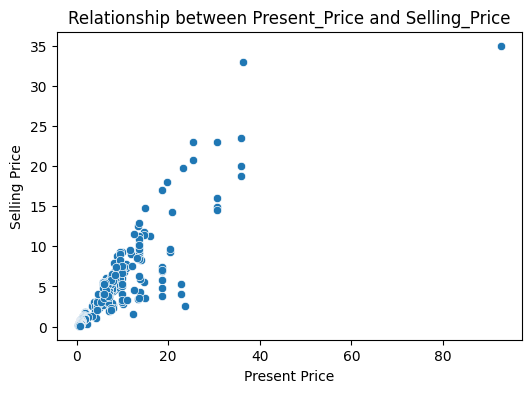

In [34]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=data)
plt.title('Relationship between Present_Price and Selling_Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')

plt.show()

In [35]:
# Separating features (X_train) and target variable (Y_train) from the training set
X_train = train_set.drop(['Selling_Price', 'Driven_kms', 'Owner', 'Year'], axis=1)  # Features
Y_train = train_set['Selling_Price'].copy()  # Target variable

In [36]:
# Separating features (X_test) and target variable (Y_test) from the testing set
X_test = test_set.drop(['Selling_Price', 'Driven_kms', 'Owner', 'Year'], axis=1)
Y_test = test_set['Selling_Price'].copy()

## Scaling the Data

In [37]:
from sklearn.preprocessing import StandardScaler

def scale_specific_columns(data, columns):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[columns])
    data[columns] = scaled_data
    return data

In [38]:
X_tr = scale_specific_columns(X_train.copy(), ['Present_Price'])

In [39]:
X_tr.head()

,Present_Price,Fuel_Type,Selling_type,Transmission
6,0.169392,0,0,0
185,-0.974468,0,1,1
187,-0.985087,0,1,0
148,-0.919854,0,1,0
31,-0.320617,0,0,0


In [40]:
X_tr.shape

(239, 4)

In [41]:
Y_train.shape

(239,)

In [42]:
X_ts = scale_specific_columns(X_test.copy(), ['Present_Price'])

In [43]:
X_ts.head()

,Present_Price,Fuel_Type,Selling_type,Transmission
283,0.155405,0,0,0
267,-0.020738,1,0,0
166,-0.670267,0,1,0
9,-0.055967,1,0,0
79,1.535928,1,0,1


In [44]:
X_ts.shape

(60, 4)

In [45]:
Y_test.shape

(60,)

## Selecting a desired model and Evaluating it

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [47]:
# Using multiple models to find which gives best results
models={
    "Linear Regression":LinearRegression(),
    "Random Forest":RandomForestRegressor(),
    "Support Vector Machines":SVR(),
    "Lasso Regression":Lasso(alpha=0.2),
    "Ridge Regression":Ridge(alpha=1.5)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_tr, Y_train) # Train model

    # Make predictions
    Y_train_pred = model.predict(X_tr)

    # Training set performance
    mse = mean_squared_error(Y_train, Y_train_pred)
    rmse = np.sqrt(mse)

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- RMSE: {:.4f}".format(rmse))

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- RMSE: 2.0403


Random Forest
Model performance for Training set
- RMSE: 1.0077


Support Vector Machines
Model performance for Training set
- RMSE: 2.7672


Lasso Regression
Model performance for Training set
- RMSE: 2.1340


Ridge Regression
Model performance for Training set
- RMSE: 2.0405




## Using better evaluation technique - Cross Validation

In [48]:
# for better evaluation techniques we went for Cross_validation on training dataset having 10 folds
from sklearn.model_selection import cross_val_score

for model_name, model in models.items():
  # Perform cross-validation and calculate RMSE scores
  scores = cross_val_score(model, X_tr, Y_train, scoring="neg_mean_squared_error", cv=10)
  rmse_scores = np.sqrt(-scores)

  # Printing model name and average RMSE
  print(f"Model: {model_name}")
  print(f"Average RMSE: {rmse_scores.mean()}")
  print("-" * 30) 

Model: Linear Regression
Average RMSE: 2.0425517044002977
------------------------------
Model: Random Forest
Average RMSE: 1.998908606635511
------------------------------
Model: Support Vector Machines
Average RMSE: 2.7404673212580026
------------------------------
Model: Lasso Regression
Average RMSE: 2.0669102863659408
------------------------------
Model: Ridge Regression
Average RMSE: 2.0389658385124303
------------------------------


## Testing the model on test data

In [49]:
# Finally testing our model on Testing Dataset and evaluating it using evaluation metrics used earlier

for i in range(len(list(models))):
    model = list(models.values())[i]

    # Make predictions
    Y_test_pred = model.predict(X_ts)

    # Training set performance
    mse = mean_squared_error(Y_test, Y_test_pred)
    rmse = np.sqrt(mse)

    print(list(models.keys())[i])

 
    print('Model performance for Testing set')
    print("- RMSE: {:.4f}".format(rmse))

    print('='*35)
    print('\n')


Linear Regression
Model performance for Testing set
- RMSE: 2.6057


Random Forest
Model performance for Testing set
- RMSE: 2.6548


Support Vector Machines
Model performance for Testing set
- RMSE: 4.6161


Lasso Regression
Model performance for Testing set
- RMSE: 2.8235


Ridge Regression
Model performance for Testing set
- RMSE: 2.6134


